In [1]:
# Importazione delle librerie necessarie
# plotting e calcolo scientifico
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

#machin learning

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error as RMSE
from sklearn.ensemble import RandomForestClassifier


import xgboost as xgb

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

import optuna

## Load dati

In [40]:
df = pd.read_csv('Exam_Score_Prediction.csv')

In [19]:
df.head(20)

student_id  age  gender   course  study_hours  class_attendance  \
0            1   17    male  diploma         2.78              92.9   
1            2   23   other      bca         3.37              64.8   
2            3   22    male     b.sc         7.88              76.8   
3            4   20   other  diploma         0.67              48.4   
4            5   20  female  diploma         0.89              71.6   
5            6   23    male   b.tech         3.48              65.4   
6            7   17  female   b.tech         1.35              69.0   
7            8   22    male     b.sc         5.48              51.1   
8            9   18   other      bca         2.89              92.0   
9           10   17    male      bba         6.77              44.8   
10          11   21  female       ba         5.99              86.9   
11          12   24    male    b.com         3.77              96.6   
12          13   22  female       ba         6.76              46.4   
13          14   23  female      bba         0.81              66.0   
14          15   22    male   b.tech         4.65              75.1   
15          16   23   other      bba         4.84              99.4   
16          17   21    male     b.sc         1.97              91.9   
17          18   18    male      bca         0.40              64.9   
18          19   23  female     b.sc         4.28              98.1   
19          20   20    male   b.tech         4.11              59.9   

   internet_access  sleep_hours sleep_quality   study_method facility_rating  \
0              yes          7.4          poor       coaching             low   
1              yes          4.6       average  online videos          medium   
2              yes          8.5          poor       coaching            high   
3              yes          5.8       average  online videos             low   
4              yes          9.8          poor       coaching             low   
5              yes          4.2          good          mixed             low   
6              yes          7.4       average  online videos            high   
7              yes          8.2          poor     self-study             low   
8              yes          6.6          poor     self-study             low   
9              yes          9.8       average    group study            high   
10             yes          5.8       average     self-study          medium   
11              no          4.1          poor  online videos          medium   
12             yes          8.1          good     self-study          medium   
13             yes          7.1          poor  online videos          medium   
14             yes          7.7          good    group study            high   
15             yes          7.3       average       coaching            high   
16             yes          8.3       average     self-study          medium   
17             yes          6.8          poor     self-study          medium   
18             yes          4.4       average          mixed             low   
19             yes          4.3          poor       coaching            high   

   exam_difficulty  exam_score  
0             hard        58.9  
1         moderate        54.8  
2         moderate        90.3  
3         moderate        29.7  
4         moderate        43.7  
5         moderate        58.2  
6             hard        53.7  
7         moderate        47.3  
8             easy        44.9  
9         moderate        77.7  
10            easy        63.2  
11            easy        53.5  
12            hard        63.9  
13        moderate        34.1  
14        moderate        83.5  
15        moderate        98.5  
16        moderate        70.3  
17        moderate        32.3  
18        moderate        56.2  
19        moderate        49.3

In [41]:
df.columns

Index(['student_id', 'age', 'gender', 'course', 'study_hours',
       'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality',
       'study_method', 'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


In [5]:
df.describe()

student_id           age   study_hours  class_attendance  \
count  20000.000000  20000.000000  20000.000000      20000.000000   
mean   10000.504600     20.473300      4.007604         70.017365   
std     5773.654959      2.284458      2.308313         17.282262   
min        1.000000     17.000000      0.080000         40.600000   
25%     5000.750000     18.000000      2.000000         55.100000   
50%    10000.500000     20.000000      4.040000         69.900000   
75%    15000.250000     22.000000      6.000000         85.000000   
max    20001.000000     24.000000      7.910000         99.400000   

       sleep_hours    exam_score  
count  20000.00000  20000.000000  
mean       7.00856     62.513225  
std        1.73209     18.908491  
min        4.10000     19.599000  
25%        5.50000     48.800000  
50%        7.00000     62.600000  
75%        8.50000     76.300000  
max        9.90000    100.000000

In [42]:
#variabili categoriche
for col in ["course","sleep_quality", "study_method", "facility_rating", "exam_difficulty"]:
    print(f"Colonna '{col}': {df[col].unique()}")

Colonna 'course': ['diploma' 'bca' 'b.sc' 'b.tech' 'bba' 'ba' 'b.com']
Colonna 'sleep_quality': ['poor' 'average' 'good']
Colonna 'study_method': ['coaching' 'online videos' 'mixed' 'self-study' 'group study']
Colonna 'facility_rating': ['low' 'medium' 'high']
Colonna 'exam_difficulty': ['hard' 'moderate' 'easy']


In [43]:
#sostituzione categorie con ordine con numeri da 1 a 3
# Dizionari con l'ordine naturale delle categorie
mappings = {
    "sleep_quality": ["poor", "average", "good"],
    "facility_rating": ["low", "medium", "high"],
    "exam_difficulty": ["easy", "moderate", "hard"]
}

# Conversione in numeri (1,2,3)
for col, ordered_cats in mappings.items():
    dtype = pd.CategoricalDtype(ordered_cats, ordered=True)
    df[col] = df[col].astype(dtype).cat.codes + 1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  int8   
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  int8   
 11  exam_difficulty   20000 non-null  int8   
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), int8(3), object(4)
memory usage: 1.6+ MB


In [47]:
df.drop(columns = ['student_id'], inplace = True)

In [10]:
df.describe()

student_id           age   study_hours  class_attendance  \
count  20000.000000  20000.000000  20000.000000      20000.000000   
mean   10000.504600     20.473300      4.007604         70.017365   
std     5773.654959      2.284458      2.308313         17.282262   
min        1.000000     17.000000      0.080000         40.600000   
25%     5000.750000     18.000000      2.000000         55.100000   
50%    10000.500000     20.000000      4.040000         69.900000   
75%    15000.250000     22.000000      6.000000         85.000000   
max    20001.000000     24.000000      7.910000         99.400000   

       sleep_hours  sleep_quality  facility_rating  exam_difficulty  
count  20000.00000   20000.000000     20000.000000     20000.000000  
mean       7.00856       1.996600         1.998200         1.892000  
std        1.73209       0.815673         0.813652         0.703179  
min        4.10000       1.000000         1.000000         1.000000  
25%        5.50000       1.000000         1.000000         1.000000  
50%        7.00000       2.000000         2.000000         2.000000  
75%        8.50000       3.000000         3.000000         2.000000  
max        9.90000       3.000000         3.000000         3.000000

## grafici

Generazione del grafico in corso...


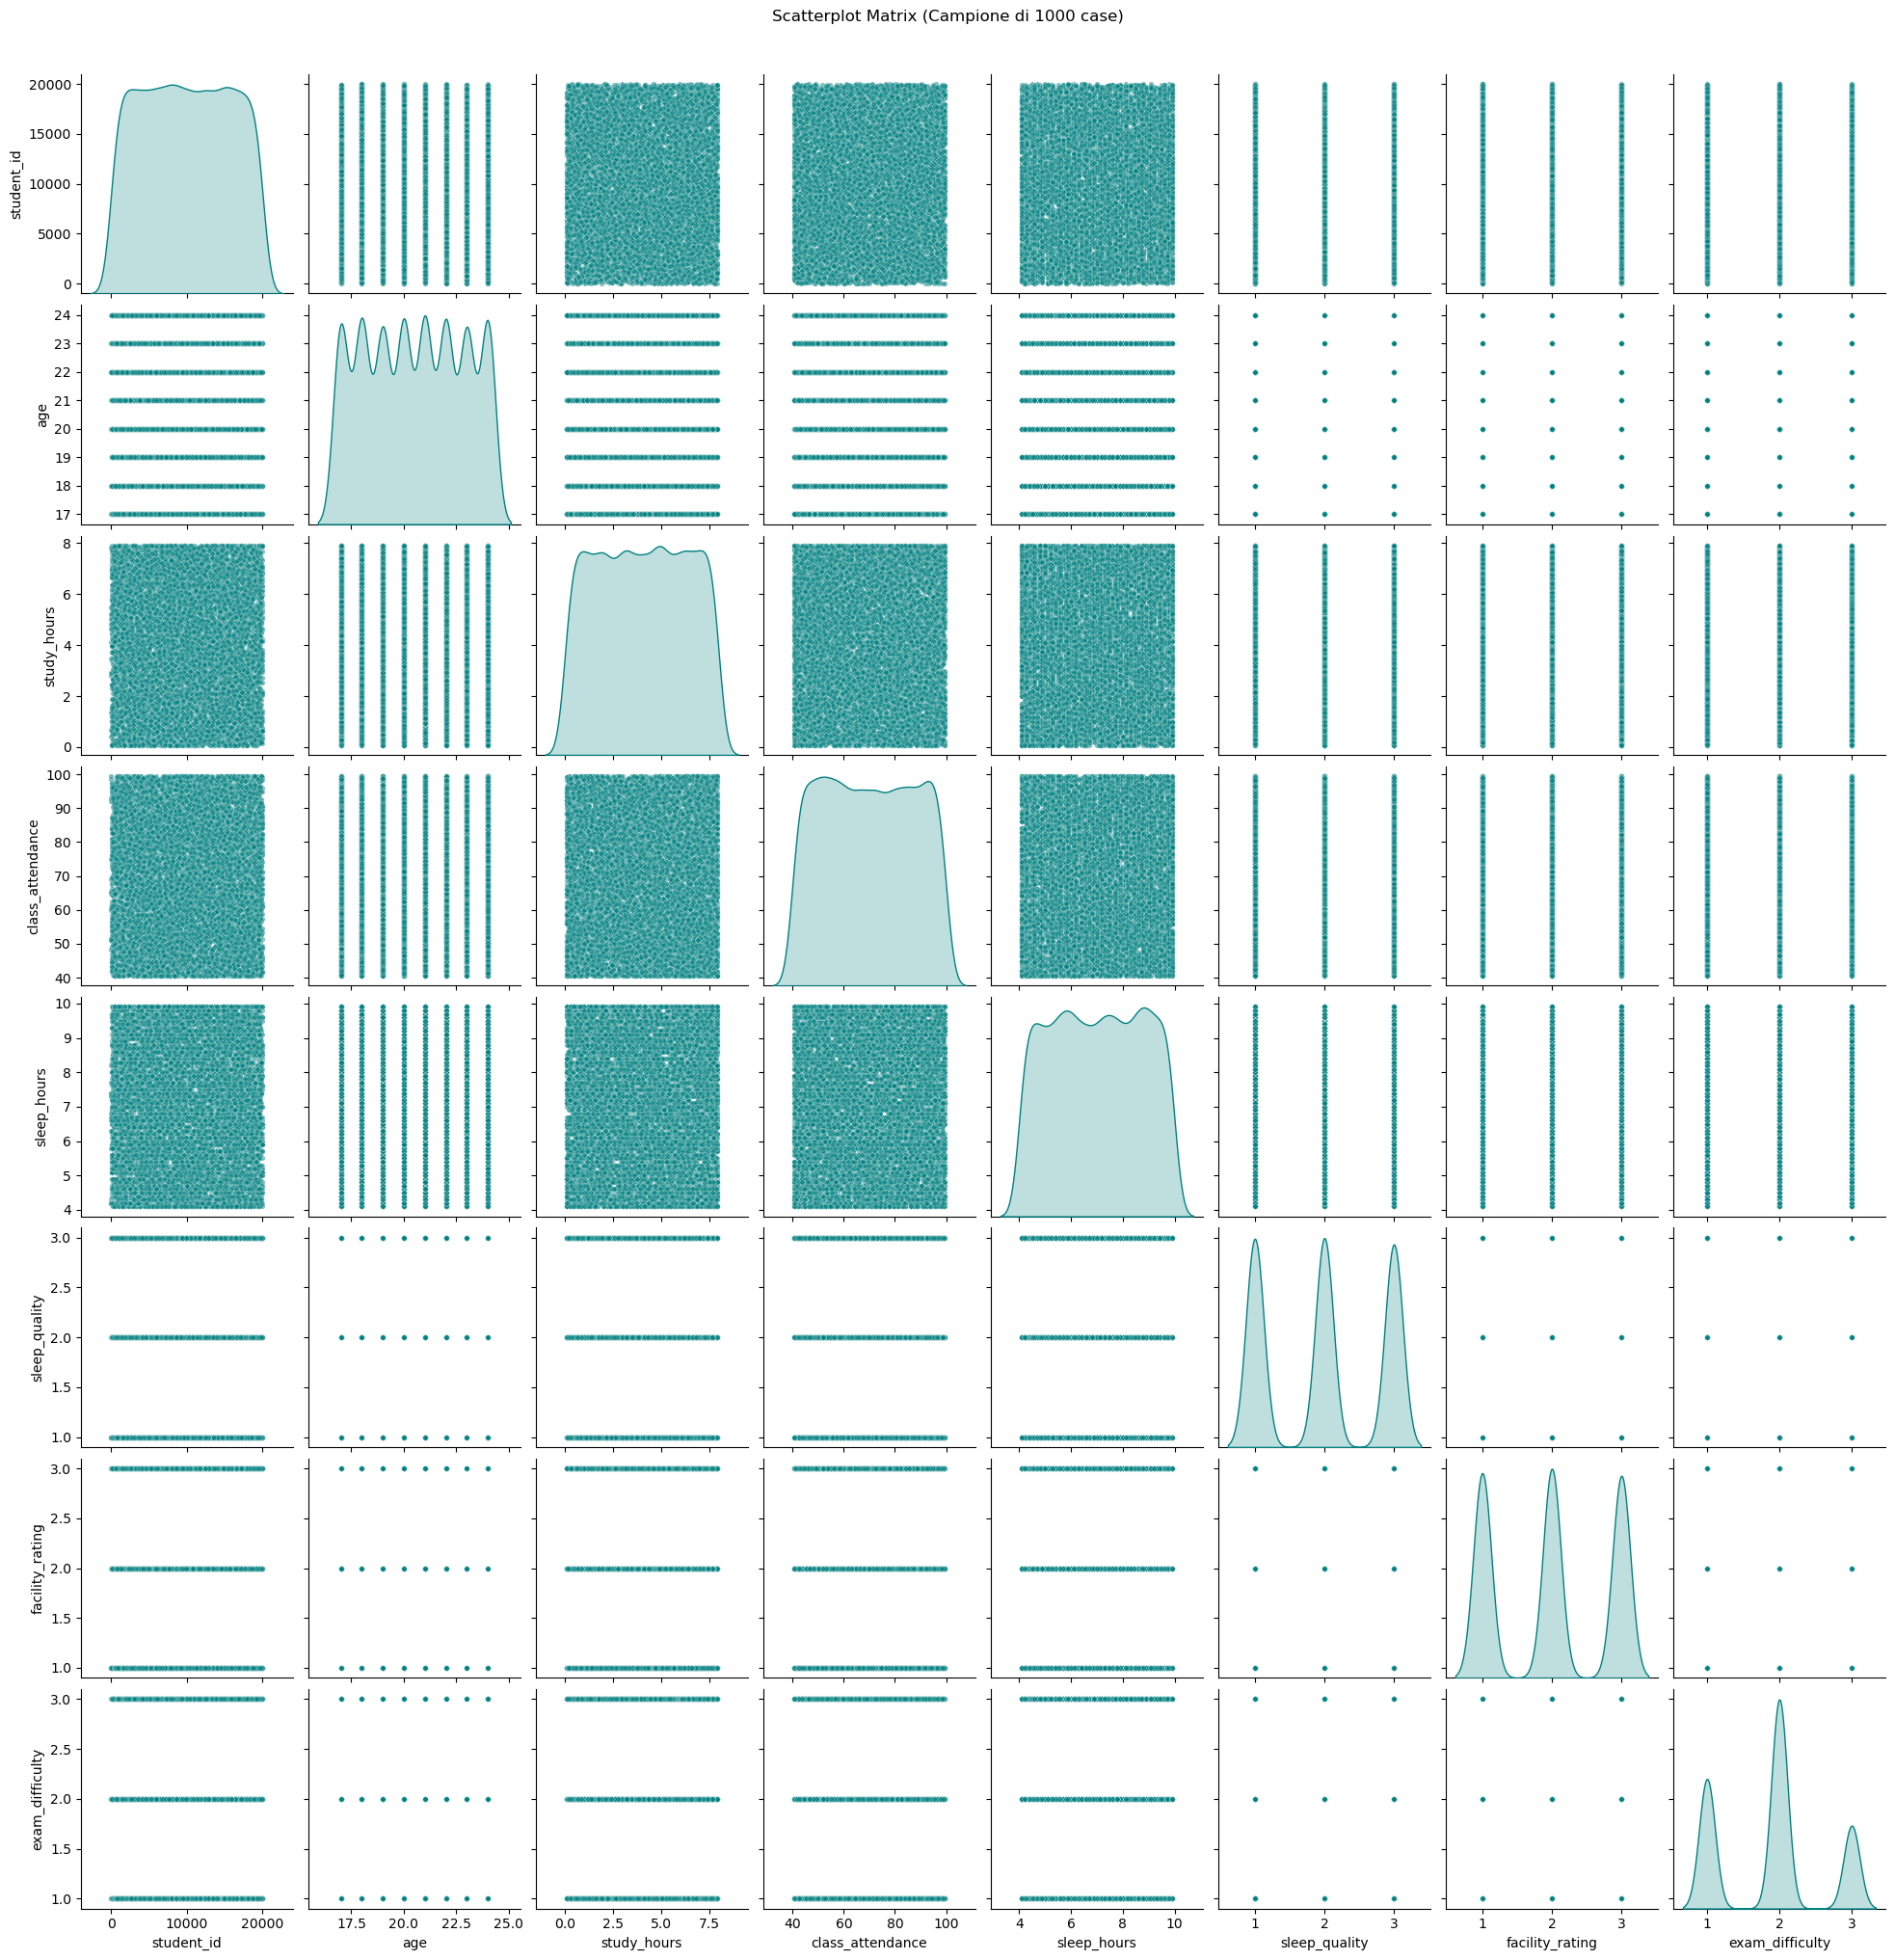

In [11]:
# 1. Selezione delle Feature più interessanti
# Escludiamo Lat/Lon (che vanno mappate, non scatterate) e variabili ridondanti
numeric = df.select_dtypes(include = ['int64','float64','int8']).columns

# 2. Campionamento dei dati
# Prendiamo un campione di 1000 righe casuali per evitare un "muro di inchiostro"
df_sample = df[numeric].sample(n=10000, random_state=42)

# 3. Creazione del Pairplot
# kind='scatter': usa i punti per le relazioni
# diag_kind='kde': usa le curve di densità sulla diagonale (invece degli istogrammi)
# plot_kws={'alpha': 0.5}: rende i punti semi-trasparenti per vedere le sovrapposizioni
print("Generazione del grafico in corso...")
g = sns.pairplot(df_sample, 
                 diag_kind='kde', 
                 plot_kws={'alpha': 0.5, 's': 15, 'color': 'teal'},
                 diag_kws={'color': 'teal', 'fill': True},
                 height=2.5)

g.fig.suptitle('Scatterplot Matrix (Campione di 1000 case)', y=1.02)
plt.show()

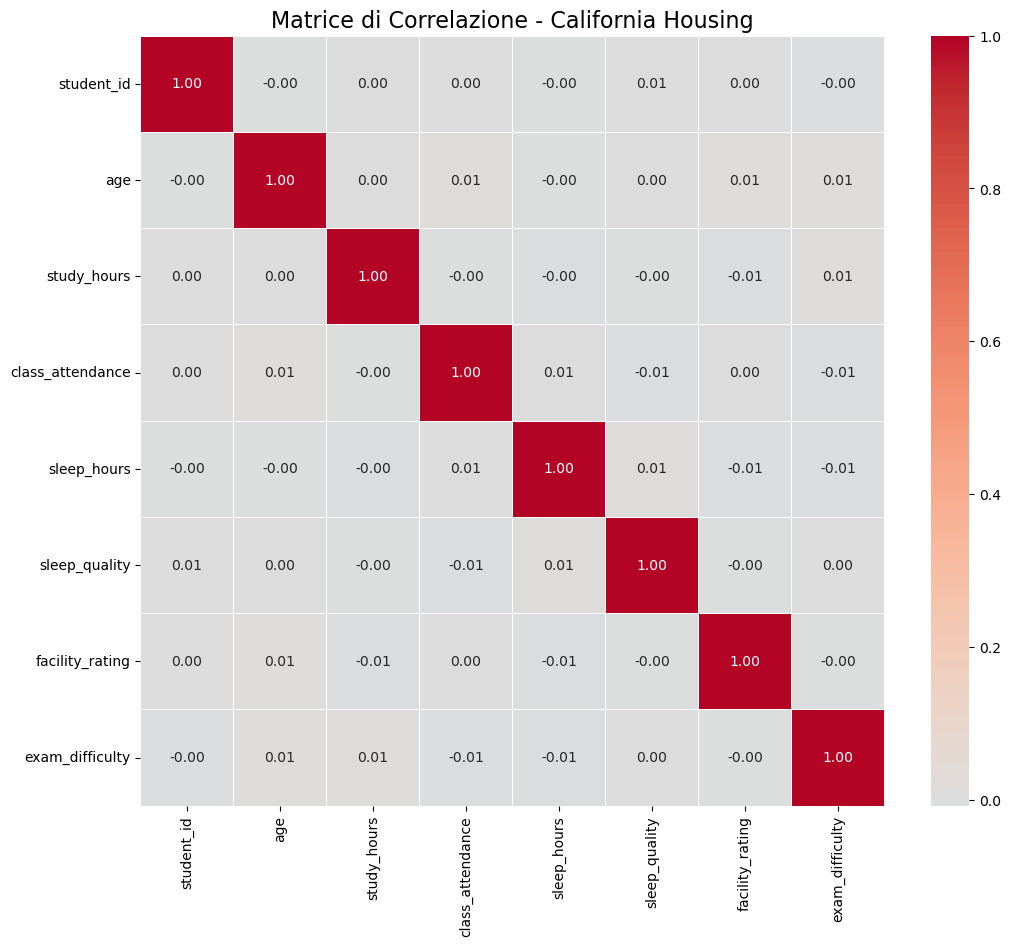

In [12]:
numeric = df.select_dtypes(include = ['int64','float64','int8'])
corr_matrix = numeric.corr()

plt.figure(figsize=(12, 10))

# 3. Creazione della Heatmap
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            linewidths=0.5, 
            linecolor='white',
            fmt=".2f")

plt.title('Matrice di Correlazione - California Housing', fontsize=16)
plt.show()

plotting della relazione del voto finale con le ore di studio e la qualità del sonno
Queste due feature sono emerse essere fra le più informative

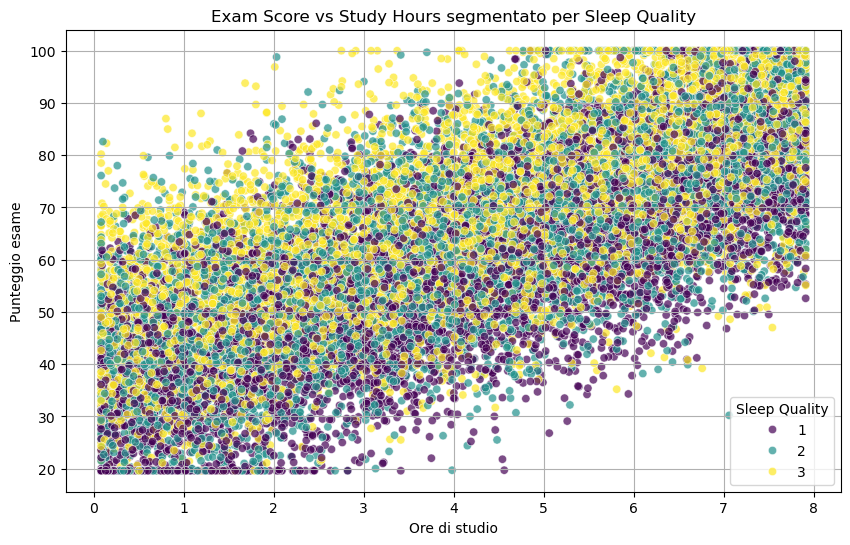

In [74]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df, 
    x='study_hours', 
    y='exam_score', 
    hue='sleep_quality', 
    palette='viridis', 
    alpha=0.7
)
plt.title("Exam Score vs Study Hours segmentato per Sleep Quality")
plt.xlabel("Ore di studio")
plt.ylabel("Punteggio esame")
plt.legend(title='Sleep Quality')
plt.grid(True)
plt.show()

vediamo il grafico della relazione con metodo di studio e tipo di programma

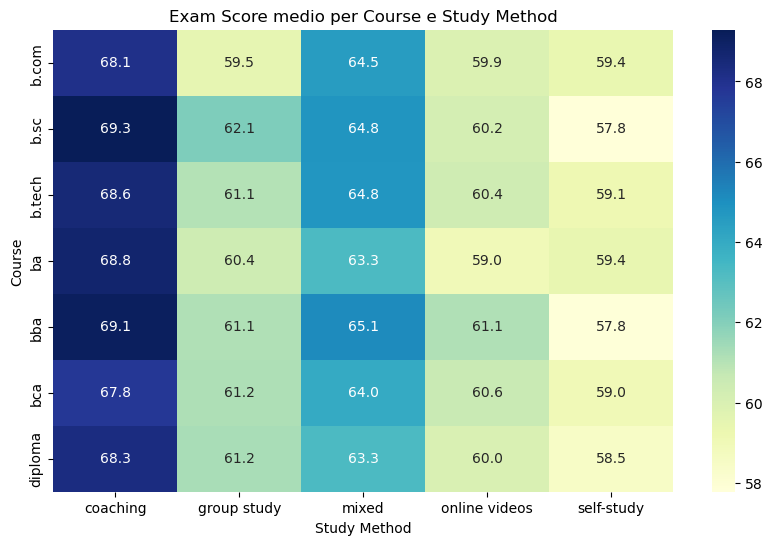

In [75]:
pivot = df.groupby(['course', 'study_method'])['exam_score'].mean().unstack()
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title("Exam Score medio per Course e Study Method")
plt.ylabel("Course")
plt.xlabel("Study Method")
plt.show()

## feature engeneering

In [45]:
df.columns

Index(['student_id', 'age', 'gender', 'course', 'study_hours',
       'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality',
       'study_method', 'facility_rating', 'exam_difficulty', 'exam_score',
       'sleep_efficiency', 'study_efficiency'],
      dtype='object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  int8   
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  int8   
 11  exam_difficulty   20000 non-null  int8   
 12  exam_score        20000 non-null  float64
 13  sleep_efficiency  20000 non-null  float64
 14  study_efficiency  20000 non-null  float64
dtypes: float64(6), int64(2), int8(3), object(4)
memory usage: 1.9+ MB


In [49]:
# -------------------------------------------------------------
# FEATURE DERIVATE PRINCIPALI
# -------------------------------------------------------------

# Efficienza del sonno
df["sleep_efficiency"] = df["sleep_hours"] * df["sleep_quality"]

# Efficienza di studio
df["study_efficiency"] = df["study_hours"] * df["class_attendance"]


# Intensità di preparazione
df["preparation_intensity"] = df["study_hours"] / df["exam_difficulty"]

# Coerenza fra presenze e studio
df["consistency_score"] = df["class_attendance"] * df["study_hours"]


# -------------------------------------------------------------
# INTERAZIONI UTILI
# -------------------------------------------------------------

# Interazione sonno × studio
df["sleep_study_interaction"] = df["sleep_hours"] * df["study_hours"]

# Interazione presenze × studio
df["attendance_study_interaction"] = df["class_attendance"] * df["study_hours"]

# Interazione difficoltà × metodo di studio
# --> se study_method è one-hot, creiamo interazioni per ogni colonna
study_method_cols = [col for col in df.columns if col.startswith("study_method")]

for col in study_method_cols:
    df[f"difficulty_{col}_interaction"] = df["exam_difficulty"] * df[col]

In [50]:
X= df.drop(columns=['exam_score'])
y = df['exam_score']

In [51]:
#normalizzazione
col_to_normalize = X.select_dtypes(include = ['int64','float64']).columns
scaler = StandardScaler()

X[col_to_normalize] = scaler.fit_transform(X[col_to_normalize])

#get dummies

X = pd.get_dummies(X, drop_first=True)

In [30]:
X.head()

age  study_hours  class_attendance  sleep_hours  sleep_quality  \
0 -1.520442    -0.531832          1.324086     0.225999              1   
1  1.106067    -0.276227         -0.301899    -1.390586              2   
2  0.668315     1.677629          0.392472     0.861085              1   
3 -0.207188    -1.445942         -1.250872    -0.697764              2   
4 -0.207188    -1.350632          0.091578     1.611643              1   

   facility_rating  exam_difficulty  gender_male  gender_other  course_b.sc  \
0                1                3         True         False        False   
1                2                2        False          True        False   
2                3                2         True         False         True   
3                1                2        False          True        False   
4                1                2        False         False        False   

   course_b.tech  course_ba  course_bba  course_bca  course_diploma  \
0          False      False       False       False            True   
1          False      False       False        True           False   
2          False      False       False       False           False   
3          False      False       False       False            True   
4          False      False       False       False            True   

   internet_access_yes  study_method_group study  study_method_mixed  \
0                 True                     False               False   
1                 True                     False               False   
2                 True                     False               False   
3                 True                     False               False   
4                 True                     False               False   

   study_method_online videos  study_method_self-study  
0                       False                    False  
1                        True                    False  
2                       False                    False  
3                        True                    False  
4                       False                    False

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

## XGB regressor

In [72]:
# --------------------------------------------------------------
# 1. FUNZIONE OBIETTIVO PER OPTUNA (REGRESSIONE)
# --------------------------------------------------------------
def objective_raw(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 1500),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.5, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        
        'gamma': trial.suggest_float('gamma', 0.0, 5.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),

        # Parametri avanzati utili per regressione
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10),

        'objective': 'reg:squarederror',
        'n_jobs': -1,
        'random_state': 42,
        'verbosity': 0,
        'tree_method': 'hist'  # più veloce e stabile
    }

    model = xgb.XGBRegressor(**params)

    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    # Usare NEG_MSE perché sklearn usa convenzione "più grande = migliore"
    scores = cross_val_score(
        model, X_train, y_train,
        cv=cv, scoring='neg_mean_squared_error',
        n_jobs=-1
    )

    # Restituiamo la MSE positiva (Optuna deve minimizzare)
    return scores.mean() * -1


# --------------------------------------------------------------
# 2. ESECUZIONE RICERCA IPERPARAMETRI
# --------------------------------------------------------------
study_raw = optuna.create_study(direction='minimize')
study_raw.optimize(objective_raw, n_trials=30, show_progress_bar=True)

print(f"\nBest CV MSE (Raw): {study_raw.best_value:.6f}")
print("Best Params:", study_raw.best_params)


# --------------------------------------------------------------
# 3. TRAINING MODELLO FINALE CON I MIGLIORI PARAMETRI
# --------------------------------------------------------------
best_params_raw = study_raw.best_params

model = xgb.XGBRegressor(**best_params_raw)
model.fit(X_train, y_train)

y_pred_raw = model.predict(X_test)

[I 2025-12-12 12:21:30,586] A new study created in memory with name: no-name-5ddc9884-a44a-4be8-bdcd-6deffa3b76f7


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2025-12-12 12:21:35,917] Trial 0 finished with value: 171.7382931630067 and parameters: {'n_estimators': 658, 'learning_rate': 0.005512932084244612, 'max_depth': 9, 'subsample': 0.8982727176558369, 'colsample_bytree': 0.6240821063989739, 'gamma': 4.039734788812833, 'reg_alpha': 4.04343986891998e-05, 'reg_lambda': 1.2719444175210258e-07, 'min_child_weight': 6, 'max_delta_step': 3}. Best is trial 0 with value: 171.7382931630067.
[I 2025-12-12 12:21:41,323] Trial 1 finished with value: 120.53307400374145 and parameters: {'n_estimators': 873, 'learning_rate': 0.24694627790437082, 'max_depth': 11, 'subsample': 0.7085206074245217, 'colsample_bytree': 0.8756400725429596, 'gamma': 3.6657517277471157, 'reg_alpha': 0.00797955979475846, 'reg_lambda': 6.458531328592368, 'min_child_weight': 9, 'max_delta_step': 1}. Best is trial 1 with value: 120.53307400374145.
[I 2025-12-12 12:21:43,305] Trial 2 finished with value: 294.70352987129934 and parameters: {'n_estimators': 260, 'learning_rate': 0.01

In [73]:
# --------------------------------------------------------------
# 4. METRICHE FINALI DI REGRESSIONE
# --------------------------------------------------------------
mse = MSE(y_test, y_pred_raw)
rmse = np.sqrt(mse)
mae = MSE(y_test, y_pred_raw)
r2 = r2_score(y_test, y_pred_raw)
mape = np.mean(np.abs((y_test - y_pred_raw) / y_test)) * 100

print("\n------------------ METRICHE FINALI ------------------")
print(f"MSE  : {mse:.6f}")
print(f"RMSE : {rmse:.6f}")
print(f"MAE  : {mae:.6f}")
print(f"MAPE : {mape:.2f}%")
print(f"R²   : {r2:.6f}")
print("------------------------------------------------------")


------------------ METRICHE FINALI ------------------
MSE  : 97.178410
RMSE : 9.857911
MAE  : 97.178410
MAPE : 14.81%
R²   : 0.728322
------------------------------------------------------


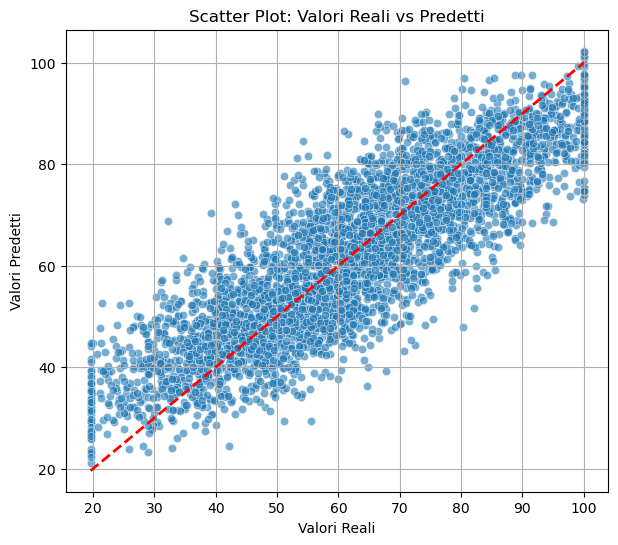

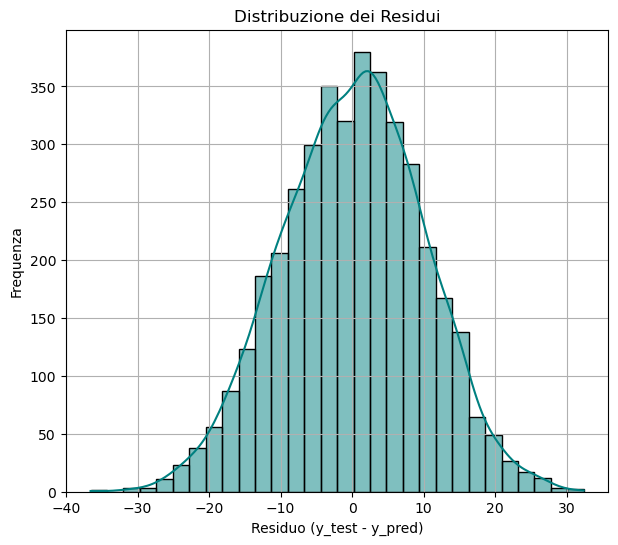

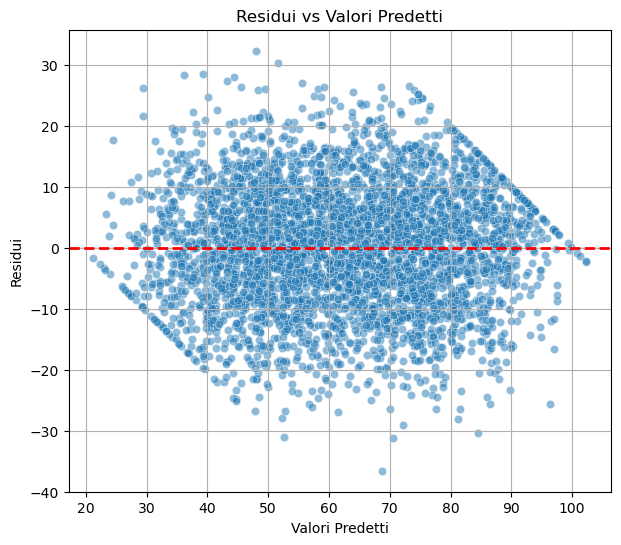

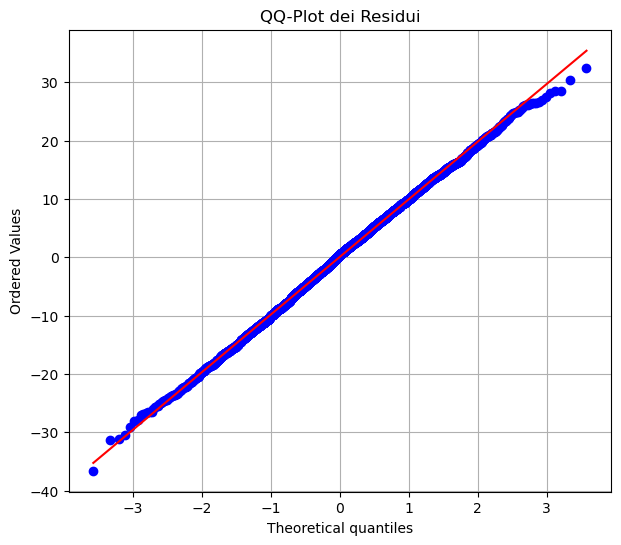

<Figure size 800x600 with 0 Axes>

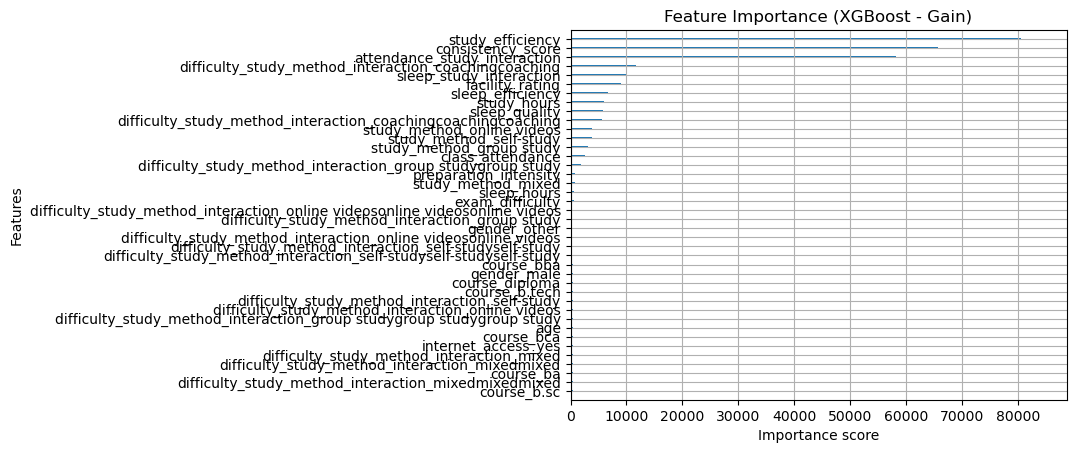

In [56]:
import scipy.stats as stats
# -----------------------------------------------------------------------------
# 1. SCATTER PLOT: y_real vs y_pred
# -----------------------------------------------------------------------------
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_pred_raw, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2)  # Linea perfetta
plt.xlabel("Valori Reali")
plt.ylabel("Valori Predetti")
plt.title("Scatter Plot: Valori Reali vs Predetti")
plt.grid(True)
plt.show()


# -----------------------------------------------------------------------------
# 2. DISTRIBUZIONE DEI RESIDUI
# -----------------------------------------------------------------------------
residuals = y_test - y_pred_raw

plt.figure(figsize=(7, 6))
sns.histplot(residuals, kde=True, bins=30, color='teal')
plt.title("Distribuzione dei Residui")
plt.xlabel("Residuo (y_test - y_pred)")
plt.ylabel("Frequenza")
plt.grid(True)
plt.show()


# -----------------------------------------------------------------------------
# 3. RESIDUI vs VALORI PREDIETTI
# -----------------------------------------------------------------------------
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_pred_raw, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residui vs Valori Predetti")
plt.xlabel("Valori Predetti")
plt.ylabel("Residui")
plt.grid(True)
plt.show()


# -----------------------------------------------------------------------------
# 4. QQ-PLOT PER VALUTARE LA NORMALITÀ DEI RESIDUI
# -----------------------------------------------------------------------------
plt.figure(figsize=(7, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ-Plot dei Residui")
plt.grid(True)
plt.show()


# -----------------------------------------------------------------------------
# 5. FEATURE IMPORTANCE (XGBoost)
# -----------------------------------------------------------------------------
plt.figure(figsize=(8, 6))
xgb.plot_importance(model, importance_type='gain', show_values=False)
plt.title("Feature Importance (XGBoost - Gain)")
plt.show()

## inseriamo la PCA prima del training per ridurre il numero di features

In [57]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def apply_pca(X, fraction=0.7):
    """
    Applica PCA a X mantenendo una frazione delle componenti principali.
    
    Parametri:
        X : DataFrame o array di feature
        fraction : float, tra 0 e 1 (es: 0.4 = mantieni 40% componenti)
    
    Ritorna:
        X_pca : features trasformate
        pca_model : il modello PCA addestrato (per ispezione)
    """
    # Numero totale feature
    n_features = X.shape[1]

    # Calcolo n componenti principali da mantenere
    n_components = max(1, int(n_features * fraction))

    print(f"Numero feature iniziali: {n_features}")
    print(f"Frazione mantenuta: {fraction}")
    print(f"Componenti PCA mantenute: {n_components}")

    # Standardizzazione (obbligatoria per PCA)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # PCA
    pca = PCA(n_components=n_components, random_state=42)
    X_pca = pca.fit_transform(X_scaled)

    return X_pca, pca

In [ ]:
# Scegli la frazione da mantenere:
fraction_to_keep = 0.75   # <-- qui decidi tu: 0.3, 0.4, 0.7, ...

# Applica PCA a X_train e X_test
X_train_pca, pca_model = apply_pca(X_train, fraction=fraction_to_keep)

# Trasforma anche X_test con lo stesso PCA
X_test_pca = pca_model.transform(StandardScaler().fit(X_train).transform(X_test))

Numero feature iniziali: 40
Frazione mantenuta: 0.6
Componenti PCA mantenute: 24


In [68]:
# --------------------------------------------------------------
# 1. FUNZIONE OBIETTIVO PER OPTUNA (REGRESSIONE)
# --------------------------------------------------------------
def objective_raw(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 1500),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.5, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        
        'gamma': trial.suggest_float('gamma', 0.0, 5.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),

        # Parametri avanzati utili per regressione
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10),

        'objective': 'reg:squarederror',
        'n_jobs': -1,
        'random_state': 42,
        'verbosity': 0,
        'tree_method': 'hist'  # più veloce e stabile
    }

    model = xgb.XGBRegressor(**params)

    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    # Usare NEG_MSE perché sklearn usa convenzione "più grande = migliore"
    scores = cross_val_score(
        model, X_train, y_train,
        cv=cv, scoring='neg_mean_squared_error',
        n_jobs=-1
    )

    # Restituiamo la MSE positiva (Optuna deve minimizzare)
    return scores.mean() * -1


# --------------------------------------------------------------
# 2. ESECUZIONE RICERCA IPERPARAMETRI
# --------------------------------------------------------------
study_raw = optuna.create_study(direction='minimize')
study_raw.optimize(objective_raw, n_trials=30, show_progress_bar=True)

print(f"\nBest CV MSE (Raw): {study_raw.best_value:.6f}")
print("Best Params:", study_raw.best_params)


# --------------------------------------------------------------
# 3. TRAINING MODELLO FINALE CON I MIGLIORI PARAMETRI
# --------------------------------------------------------------
best_params_raw = study_raw.best_params

model = xgb.XGBRegressor(**best_params_raw)
model.fit(X_train_pca, y_train)


[I 2025-12-12 12:11:35,240] A new study created in memory with name: no-name-6484a043-c01e-4a35-ab9b-4cea3a596177


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2025-12-12 12:11:36,030] Trial 0 finished with value: 270.64885860060326 and parameters: {'n_estimators': 259, 'learning_rate': 0.015409111757915518, 'max_depth': 7, 'subsample': 0.8491572307248035, 'colsample_bytree': 0.6175999169762652, 'gamma': 0.34269971301388147, 'reg_alpha': 0.15059496261692396, 'reg_lambda': 0.1936598649656046, 'min_child_weight': 3, 'max_delta_step': 1}. Best is trial 0 with value: 270.64885860060326.
[I 2025-12-12 12:11:37,398] Trial 1 finished with value: 101.10734894697502 and parameters: {'n_estimators': 632, 'learning_rate': 0.01394632860137175, 'max_depth': 4, 'subsample': 0.730148194168226, 'colsample_bytree': 0.8673923119493976, 'gamma': 1.920361874240419, 'reg_alpha': 0.0044243148498041025, 'reg_lambda': 1.9421920473063116e-07, 'min_child_weight': 5, 'max_delta_step': 4}. Best is trial 1 with value: 101.10734894697502.
[I 2025-12-12 12:11:54,609] Trial 2 finished with value: 107.86344975944955 and parameters: {'n_estimators': 1169, 'learning_rate': 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9715511607342983, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=2.5470942127882235, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.020321010816529296,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=8, max_depth=4, max_leaves=None, min_child_weight=7,
             missing=nan, monotone_constraints=None, multi_strategy=None,
             n_estimators=726, n_jobs=None, num_parallel_tree=None, ...)

In [69]:
y_pred_raw = model.predict(X_test_pca)

In [70]:
# --------------------------------------------------------------
# 4. METRICHE FINALI DI REGRESSIONE
# --------------------------------------------------------------
mse = MSE(y_test, y_pred_raw)
rmse = np.sqrt(mse)
mae = MSE(y_test, y_pred_raw)
r2 = r2_score(y_test, y_pred_raw)
mape = np.mean(np.abs((y_test - y_pred_raw) / y_test)) * 100

print("\n------------------ METRICHE FINALI ------------------")
print(f"MSE  : {mse:.6f}")
print(f"RMSE : {rmse:.6f}")
print(f"MAE  : {mae:.6f}")
print(f"MAPE : {mape:.2f}%")
print(f"R²   : {r2:.6f}")
print("------------------------------------------------------")


------------------ METRICHE FINALI ------------------
MSE  : 101.032341
RMSE : 10.051485
MAE  : 101.032341
MAPE : 15.14%
R²   : 0.717548
------------------------------------------------------
